## Load SIXD on COCO

In [1]:
import os
import torch
import torchvision.transforms as transforms

import config
from model import YOLOv3
from dataset import prepare_train_dataset

In [2]:
img_datasets, dataloader = prepare_train_dataset('tejani', 416, 13)

Successfully load annotations from disk


In [3]:
yolo = YOLOv3('../lib/yolov3.cfg', 416)
yolo.train()
name = None
img_tensor = None
img_anno = None
for batch_idx, (names, inputs, targets) in enumerate(dataloader):
    if batch_idx == 0:
        img_tensor = inputs
        img_anno = targets
        name = names
        break

In [5]:
targets[0]

[{'name': 2, 'bbox': [254, 367, 47, 170]},
 {'name': 4, 'bbox': [178, 399, 25, 124]},
 {'name': 4, 'bbox': [227, 389, 247, 323]},
 {'name': 1, 'bbox': [343, 407, 121, 184]},
 {'name': 2, 'bbox': [201, 312, 150, 282]},
 {'name': 4, 'bbox': [380, 548, 196, 340]},
 {'name': 2, 'bbox': [136, 209, 65, 142]},
 {'name': 1, 'bbox': [431, 484, 149, 222]}]

In [7]:
import os
from PIL import Image, ImageDraw
opj = os.path.join

In [8]:
img = Image.open(opj('/media/data_2/COCO_SIXD/tejani/JPEGImages', name[0]))

In [9]:
draw = ImageDraw.Draw(img)
for target in targets[0]:
    bbox = target['bbox']
    draw.rectangle(((bbox[0    bbox = target['bbox']
    draw.rectangle(((bbox[0], bbox[2]), (bbox[1], bbox[3])), outline='red')

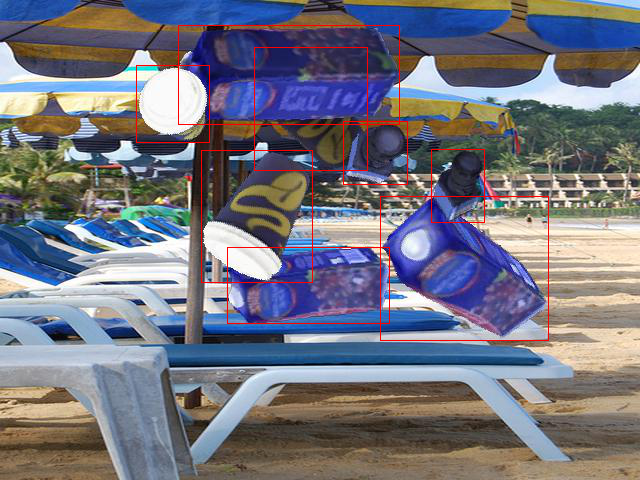

In [10]:
img

## Load COCO

In [ ]:
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import CocoDetection
opj = os.path.join

In [ ]:
from PIL import Image
class COCO(CocoDetection):    
    def __getitem__(self, index):
        coco = self.coco
        img_id = self.ids[index]
        ann_ids = coco.getAnnIds(imgIds=img_id)
        target = coco.loadAnns(ann_ids)
        path = coco.loadImgs(img_id)[0]['file_name']
        img = Image.open(os.path.join(self.root, path)).convert('RGB')
        if self.transform is not None:
            img = self.transform(img)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return img, target, path

In [ ]:
transform = transforms.Compose([
  transforms.Resize(size=(416, 416), interpolation=3),
  transforms.ToTensor()
])

COCO_ROOT = '/media/data_2/COCO/2017'
train_datasets = COCO(
    root=opj(COCO_ROOT, 'train2017'), 
    annFile=opj(COCO_ROOT, 'annotations/instances_train2017.json'), 
    transform=transform
)
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=32, num_workers=4, shuffle=True)

In [ ]:
inputs = None
labels = None
path = None
for batch_idx, (i, l, p) in enumerate(train_dataloader):
    inputs = i
    labels = l
    path = p
    if batch_idx == 0:
        break

In [ ]:
print(labels[0].keys())
print(labels[0]['image_id'][0])
print(labels[0]['category_id'][0])
print(path[0])

### Bouding box format

```
labels:

[[x1, ..., x32],
 [y1, ..., y32],
 [width1, ..., width32],
 [height1, ..., height32]]
```

In [ ]:
TRAIN_ROOT = opj(COCO_ROOT, 'train2017')
img = Image.open(opj(TRAIN_ROOT, path[0]))

In [ ]:
from PIL import Image, ImageFont, ImageDraw, ImageEnhance
draw = ImageDraw.Draw(img)
bbox = labels[0][0], labels[1][0], labels[2][0], labels[3][0] 
x1 = bbox[0]
y1 = bbox[1]
x2 = x1 + bbox[2]
y2 = y1 + bbox[3]
draw.rectangle(((x1, y1, x2, y2)), outline='red')
img

## Images

In [ ]:
import os
import torch
import numpy as np
from torchvision import datasets, transforms
opj = os.path.join

In [ ]:
from PIL import Image, ImageFont, ImageDraw, ImageEnhance
from skimage.io import imread
img = Image.open('../assets/test.png')
transform = transforms.Compose([
  transforms.Resize(size=(416, 416), interpolation=3),
  transforms.ToTensor(),
  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
img = transform(img)

In [ ]:
from dataset import TestDataset

In [ ]:
img_datasets = TestDataset('/media/data_1/home/penggao/penggao/detection/ecr23.yolo3/assets/imgs', transform)
dataloader = torch.utils.data.DataLoader(img_datasets, batch_size=1, num_workers=4)

In [ ]:
img_datasets[0][0].size()

In [ ]:
img_name, img_path = img_datasets.get_img_info(5)
img_name
class_names = ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic' 'light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

In [ ]:
detection = np.load('../static/detection.npy')
detection

In [ ]:
img = Image.open(img_path)
w, h = img.size
h_ratio = h / 320
w_ratio = w / 320
h_ratio, w_ratio

In [ ]:
draw = ImageDraw.Draw(img)
for i in range(detection.shape[0]):
    bbox = detection[i,1:5]
    label = class_names[int(detection[i, -1])]
    confidence = '%.2f' % detection[i, -2]
    caption = str(label) + ' ' + str(confidence)
    x1, y1, x2, y2 = bbox[0], bbox[1], bbox[2], bbox[3]
    draw.rectangle(((x1 * w_ratio, y1 * h_ratio,x2 * w_ratio, y2 * h_ratio)), outline='red')
    draw.text((x1 * w_ratio, y1 * h_ratio), caption, fill='red')

In [ ]:
img

## Read File

In [ ]:
import torch
import numpy as np

In [ ]:
fp = open('../weights/yolov3.weights', 'rb')
header = np.fromfile(fp, dtype=np.int32, count=5)
weights = np.fromfile(fp, dtype=np.float32)
fp.close()

## Header Information

The first 4 values are header information

1. Major version number
2. Minor version number
3. Subversion number
4. Images seen

In [ ]:
header = torch.Tensor(header)
seen = header[3]

In [ ]:
weights.shape

## Visualization

In [3]:
import os
import cv2
import numpy as np
from model import YOLOv3
from matplotlib import patches
from matplotlib import pyplot as plt

In [5]:
detection = np.load('../lib/detections.npy')
detection.shape

(1, 25200, 85)

In [ ]:
ayoosh_detection = np.load('../static/ayoosh.detection.npy')
ayoosh_detection.shape

In [ ]:
img = cv2.imread("../assets/test.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
img.shape

In [ ]:
h, w, _ = img.shape
h_ratio = h / 320
w_ratio = w / 320
h_ratio, w_ratio

In [ ]:
bbox = detection[2,1:5]
x1, y1, x2, y2 = bbox[0], bbox[1], bbox[2], bbox[3]
implot = plt.imshow(img)
plt.scatter([x1 * w_ratio, x2 * w_ratio], [y1 * h_ratio, y2 * h_ratio])
plt.show()